In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python import debug as tf_debug
from keras.callbacks import History
from keras import optimizers,Sequential, initializers, regularizers,callbacks
from keras import backend as K
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from helper import *

In [2]:
(data1,data2) = load_data()

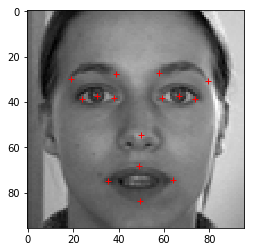

In [3]:
plot_image(data1,12,True)

flip_indices = [
    (0, 2), (1, 3),
    (4, 8), (5, 9), (6, 10), (7, 11),
    (12, 16), (13, 17), (14, 18), (15, 19),
    (22, 24), (23, 25),
    ]


for i, j in flip_indices:
    a = x[i]
    b = x[j]
    x[i] = b
    x[j] = a

In [4]:
def rmse(y_pred,y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [93]:
model.fit(x=train_x2, y=train_y2,epochs=50,batch_size=128,validation_data=(test_x2, test_y2))

Train on 1498 samples, validate on 642 samples
Epoch 1/50
1498/1498 [==============================] - 1s 642us/step - loss: 0.2979 - acc: 0.4332 - val_loss: 0.3143 - val_acc: 0.0374
Epoch 2/50
1498/1498 [==============================] - 1s 521us/step - loss: 0.2670 - acc: 0.4426 - val_loss: 0.2980 - val_acc: 0.4564
Epoch 3/50
1498/1498 [==============================] - 1s 530us/step - loss: 0.2637 - acc: 0.8037 - val_loss: 0.2832 - val_acc: 0.4548
Epoch 4/50
1498/1498 [==============================] - 1s 526us/step - loss: 0.2632 - acc: 0.8057 - val_loss: 0.2824 - val_acc: 0.4564
Epoch 5/50
1498/1498 [==============================] - 1s 524us/step - loss: 0.2631 - acc: 0.8117 - val_loss: 0.2801 - val_acc: 0.4564
Epoch 6/50
1498/1498 [==============================] - 1s 529us/step - loss: 0.2630 - acc: 0.8117 - val_loss: 0.2803 - val_acc: 0.4564
Epoch 7/50
1498/1498 [==============================] - 1s 530us/step - loss: 0.2628 - acc: 0.8091 - val_loss: 0.2796 - val_acc: 0.4564
E

In [97]:
preds = model.evaluate(x=test_x2, y = test_y2)
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

642/642 [==============================] - 0s 201us/step
Loss = 0.2643925097315482
Test Accuracy = 0.49221183800623053


In [5]:
x,y = preprocess_1d(data=data1)

/Users/gianlucatadori/Documents/Programming/kaggle_facial/helper.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))


In [27]:
model = Sequential()
model.add(Dense(100, input_dim=9216))
model.add(Activation('relu'))
model.add(Dense(30))
sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="mse", optimizer=sgd)
es = callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=0, mode='auto')
history = model.fit(x,y,epochs=1000,validation_split=.2,verbose=1,callbacks=[es])

Train on 1712 samples, validate on 428 samples
Epoch 1/1000
1712/1712 [==============================] - 1s 550us/step - loss: 0.0528 - val_loss: 0.0150
Epoch 2/1000
1712/1712 [==============================] - 0s 264us/step - loss: 0.0128 - val_loss: 0.0114
Epoch 3/1000
1712/1712 [==============================] - 0s 260us/step - loss: 0.0110 - val_loss: 0.0101
Epoch 4/1000
1712/1712 [==============================] - 0s 264us/step - loss: 0.0098 - val_loss: 0.0108
Epoch 5/1000
1712/1712 [==============================] - 0s 264us/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/1000
1712/1712 [==============================] - 0s 264us/step - loss: 0.0087 - val_loss: 0.0090
Epoch 7/1000
1712/1712 [==============================] - 0s 264us/step - loss: 0.0082 - val_loss: 0.0081
Epoch 8/1000
1712/1712 [==============================] - 0s 279us/step - loss: 0.0077 - val_loss: 0.0091
Epoch 9/1000
1712/1712 [==============================] - 0s 277us/step - loss: 0.0076 - val_loss: 0.0087

1712/1712 [==============================] - 0s 273us/step - loss: 0.0031 - val_loss: 0.0040
Epoch 78/1000
1712/1712 [==============================] - 0s 272us/step - loss: 0.0029 - val_loss: 0.0039
Epoch 79/1000
1712/1712 [==============================] - 0s 266us/step - loss: 0.0028 - val_loss: 0.0043
Epoch 80/1000
1712/1712 [==============================] - 0s 269us/step - loss: 0.0030 - val_loss: 0.0042
Epoch 81/1000
1712/1712 [==============================] - 0s 272us/step - loss: 0.0029 - val_loss: 0.0038
Epoch 82/1000
1712/1712 [==============================] - 1s 297us/step - loss: 0.0029 - val_loss: 0.0038
Epoch 83/1000
1712/1712 [==============================] - 0s 276us/step - loss: 0.0029 - val_loss: 0.0038
Epoch 84/1000
1712/1712 [==============================] - 0s 285us/step - loss: 0.0028 - val_loss: 0.0037
Epoch 85/1000
1712/1712 [==============================] - 0s 280us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 86/1000
1712/1712 [==========================

In [129]:
test_x = preprocess_1d(data2,True)

In [31]:
pred = model.predict(test_x)

In [38]:
pred[0] * 48 + 48

array([63.045486, 35.023476, 30.705723, 37.194695, 59.427895, 37.050972,
       71.797935, 38.70309 , 36.24117 , 38.966408, 22.846338, 40.338036,
       53.23693 , 27.37459 , 78.61934 , 30.037235, 39.854736, 28.50988 ,
       18.11023 , 29.479866, 46.87405 , 55.334984, 62.207344, 72.39566 ,
       33.05121 , 74.263245, 48.437515, 71.095215, 48.644005, 80.39359 ],
      dtype=float32)

In [45]:
label[0::2]

15

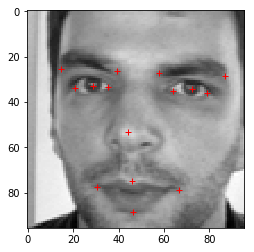

In [53]:
plot_image(data1,29,True)

In [168]:
def plot_test(x,y,n=0):
    
    if x.shape[0] == 1:
        image = x
        label = y * 48 + 48
        image = image.reshape([96,96])
        fig,ax = plt.subplots()
        ax.imshow(image,cmap="gray")
        for i in range(0,(len(label)-1),2):
            ax.plot(label[i],label[i+1],color="r",marker="+")
        plt.show()
    else:
        image = x[(n-1)]
        label = y[(n-1)] * 48 + 48
        image = image.reshape([96,96])
        fig,ax = plt.subplots()
        ax.imshow(image,cmap="gray")
        for i in range(0,(len(label)-1),2):
            ax.plot(label[i],label[i+1],color="r",marker="+")
        plt.show()

    

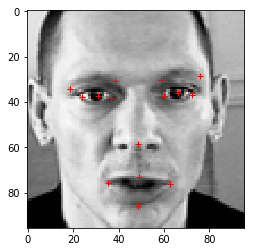

In [59]:
plot_test(x,y,99)

In [61]:
import PIL
from PIL import Image

In [104]:
test_x[0]

array([0.7137255 , 0.7176471 , 0.7137255 , ..., 0.03137255, 0.01960784,
       0.01960784], dtype=float32)

In [112]:
x / 255

array([0.73333333, 0.73333333, 0.73333333, ..., 0.9254902 , 0.9254902 ,
       0.92156863])

In [184]:
image = Image.open("/Users/gianlucatadori/Documents/Programming/kaggle_facial/immagini/immagini.quotidiano.net")
image = image.resize([96,96],PIL.Image.ANTIALIAS)
image = image.convert("L")
x = np.asarray(image.getdata()) / 255
#test_x = np.append(test_x,x)
#print(len(test_x))
#y = model.predict(test_x)
image

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gianlucatadori/Documents/Programming/kaggle_facial/immagini/immagini.quotidiano.net'

In [182]:
def plot_im_test(x,y):
    
        image = x
        label = y[0] * 48 + 48
        image = image.reshape([96,96])
        fig,ax = plt.subplots()
        ax.imshow(image,cmap="gray")
        for i in range(0,(len(label)-1),2):
            ax.plot(label[i],label[i+1],color="r",marker="+")
        plt.show()

In [181]:
label = y * 48 + 48
y[0]

array([ 0.19369844, -0.23157373, -0.32002708, -0.18015882,  0.21613371,
       -0.12113637,  0.46185678, -0.14141597, -0.18119027, -0.14385769,
       -0.51554525, -0.10602547,  0.12708329, -0.3357975 ,  0.61072326,
       -0.25755504, -0.09757318, -0.31353766, -0.5382747 , -0.2671079 ,
       -0.02044492,  0.17087242,  0.3262025 ,  0.4454269 , -0.3345129 ,
        0.48702717,  0.06897254,  0.48709774,  0.04920498,  0.6125765 ],
      dtype=float32)

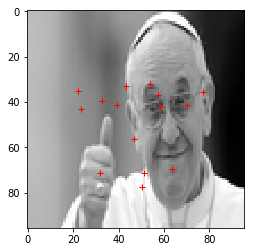

In [183]:
plot_im_test(x,y)

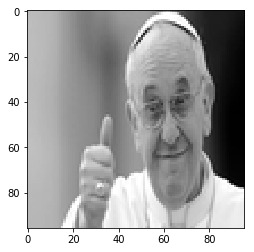

array([[ 0.19369844, -0.23157373, -0.32002708, -0.18015882,  0.21613371,
        -0.12113637,  0.46185678, -0.14141597, -0.18119027, -0.14385769,
        -0.51554525, -0.10602547,  0.12708329, -0.3357975 ,  0.61072326,
        -0.25755504, -0.09757318, -0.31353766, -0.5382747 , -0.2671079 ,
        -0.02044492,  0.17087242,  0.3262025 ,  0.4454269 , -0.3345129 ,
         0.48702717,  0.06897254,  0.48709774,  0.04920498,  0.6125765 ]],
      dtype=float32)

In [172]:
x = np.asarray(image.getdata()) / 255
x.shape
x = x[:,None].T
y = model.predict(x)
plot_im_test(x,y)
y

In [81]:
image = Image.open("/Users/gianlucatadori/Documents/Programming/kaggle_facial/immagini/papafrancesco.jpg")
image.thumbnail([96,96],Image.ANTIALIAS)
image = image.convert("1")
x = np.asarray(image.getdata())
x = x.reshape((96,96))
plt.imshow(x)
plt.show()


ValueError: cannot reshape array of size 5472 into shape (96,96)

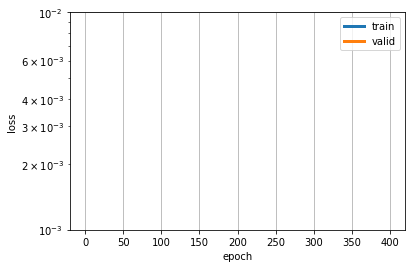

In [19]:
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3, 1e-2)
plt.yscale("log")
plt.show()

In [18]:
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    x.shape, x.min(), x.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == -0.920; y.max == 0.996


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               921700    
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_x2, train_y2, test_x2, test_y2 = preprocess_2d(data,.8)

In [ ]:
def conv_model(in_shape):
    
    x = Input(in_shape)
    
    conv1 = Conv2D(32,(3,3),strides=(1,1),padding="same")(x)
    conv1 = Activation("relu")(conv1)
    conv1 = MaxPooling2D((2,2))(conv1)
    conv1 = Dropout(.2)(conv1)
    
    conv2 = Conv2D(64,(3,3),strides=(1,1),padding="same")(conv1)
    conv2 = Activation("relu")(conv2)
    conv2 = MaxPooling2D((2,2))(conv2)
    conv2 = Dropout(.2)(conv2)
    
    conv3 = Conv2D(64,(3,3),strides=(1,1),padding="same")(conv2)
    conv3 = Activation("relu")(conv3)
    conv3 = MaxPooling2D((2,2))(conv3)
    conv3 = Dropout(.2)(conv3)
    
    flat = Flatten()(conv3)
    out = Dense(30,activation="relu")(flat)
    
    model = Model(inputs= x, outputs = out)
    
    return model

In [ ]:
model = conv_model((96,96,1))
model.compile(optimizer="adam", loss=rmse,metrics=["accuracy"])

 
history = History()